Inspect the data to understand its structure and contents.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('imdb_top_1000.csv')

df.head()



,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [29]:
df['Meta_score']=df['Meta_score'].fillna(round(df['Meta_score'].mean()))

In [30]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,1000.000000,1.000000e+03
mean,7.949300,77.976000,2.736929e+05
std,0.275491,11.362065,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,72.000000,5.552625e+04
50%,7.900000,78.000000,1.385485e+05
75%,8.100000,85.250000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


Data Preprocessing:

Handle missing values and convert data types as needed.

In [31]:
df = df.dropna(subset=['Meta_score', 'Gross', 'Released_Year', 'Runtime', 'IMDB_Rating', 'No_of_Votes'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 831 entries, 0 to 997
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    831 non-null    object 
 1   Series_Title   831 non-null    object 
 2   Released_Year  831 non-null    object 
 3   Certificate    785 non-null    object 
 4   Runtime        831 non-null    object 
 5   Genre          831 non-null    object 
 6   IMDB_Rating    831 non-null    float64
 7   Overview       831 non-null    object 
 8   Meta_score     831 non-null    float64
 9   Director       831 non-null    object 
 10  Star1          831 non-null    object 
 11  Star2          831 non-null    object 
 12  Star3          831 non-null    object 
 13  Star4          831 non-null    object 
 14  No_of_Votes    831 non-null    int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 110.4+ KB


In [33]:
df['Gross'].isnull().sum()

np.int64(0)

In [34]:
df = df.dropna(subset=['Meta_score', 'Gross', 'Released_Year', 'Runtime', 'IMDB_Rating', 'No_of_Votes'])

# Handle missing values and convert data types
df['Meta_score'] = df['Meta_score'].astype(float)
df['Gross'] = df['Gross'].astype(str).str.replace(',', '').apply(lambda x: float(x) if x else 0.0)
df['IMDB_Rating'] = df['IMDB_Rating'].astype(float)
df['No_of_Votes'] = df['No_of_Votes'].astype(int)

# Display the first few rows of the DataFrame
#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 831 entries, 0 to 997
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    831 non-null    object 
 1   Series_Title   831 non-null    object 
 2   Released_Year  831 non-null    object 
 3   Certificate    785 non-null    object 
 4   Runtime        831 non-null    object 
 5   Genre          831 non-null    object 
 6   IMDB_Rating    831 non-null    float64
 7   Overview       831 non-null    object 
 8   Meta_score     831 non-null    float64
 9   Director       831 non-null    object 
 10  Star1          831 non-null    object 
 11  Star2          831 non-null    object 
 12  Star3          831 non-null    object 
 13  Star4          831 non-null    object 
 14  No_of_Votes    831 non-null    int64  
 15  Gross          831 non-null    float64
dtypes: float64(3), int64(1), object(12)
memory usage: 110.4+ KB


Rating Trend Over Years

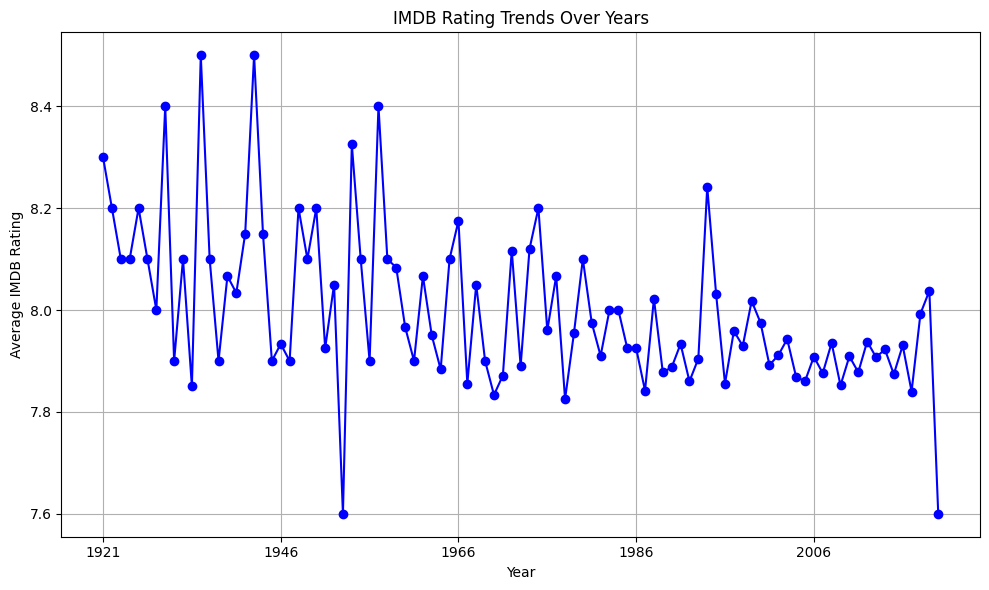

In [35]:
plt.figure(figsize=(10, 6))
df.groupby('Released_Year')['IMDB_Rating'].mean().plot(kind='line', marker='o', color='b')
plt.title('IMDB Rating Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Average IMDB Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

Genre Porpularity Analysis

C:\Users\User\AppData\Local\Temp\ipykernel_47884\87276170.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres.index, y=genres.values, palette='viridis')


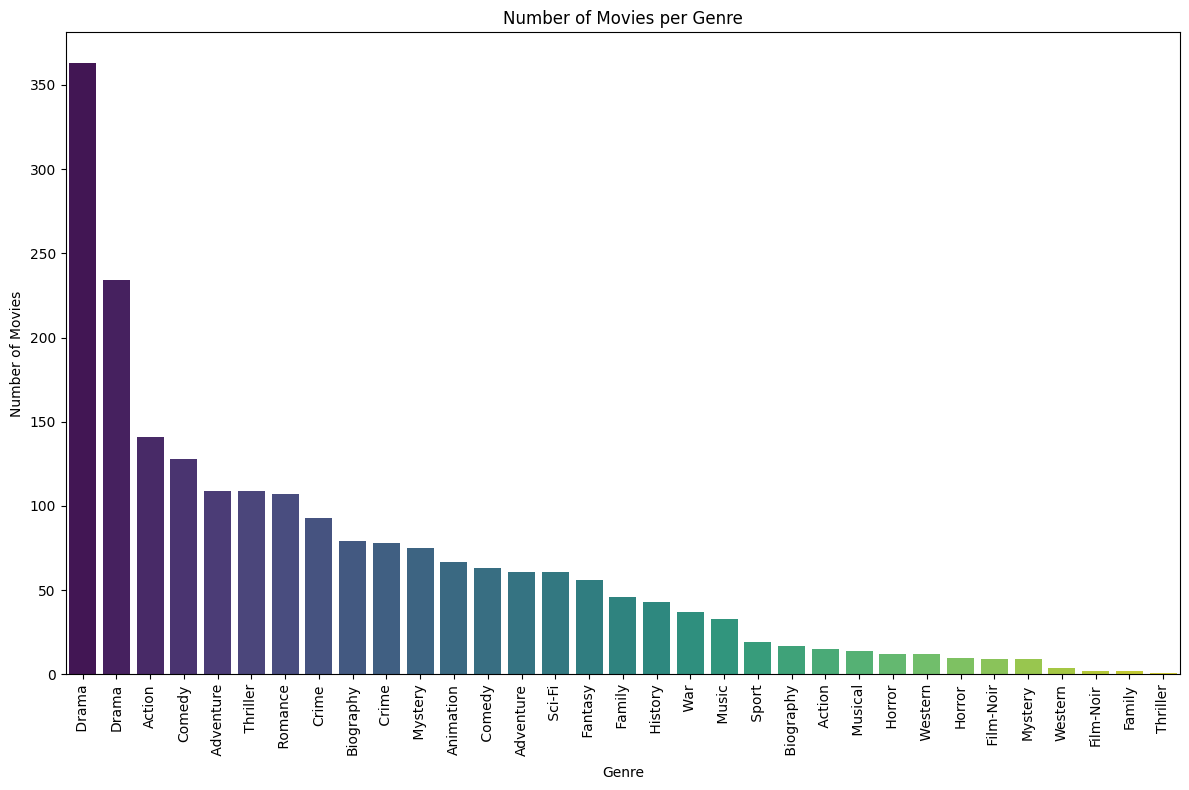

In [ ]:

genres = df['Genre'].str.split(',', expand=True).stack().value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=genres.index, y=genres.values, palette='viridis')
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Director’s Impact on Ratings:



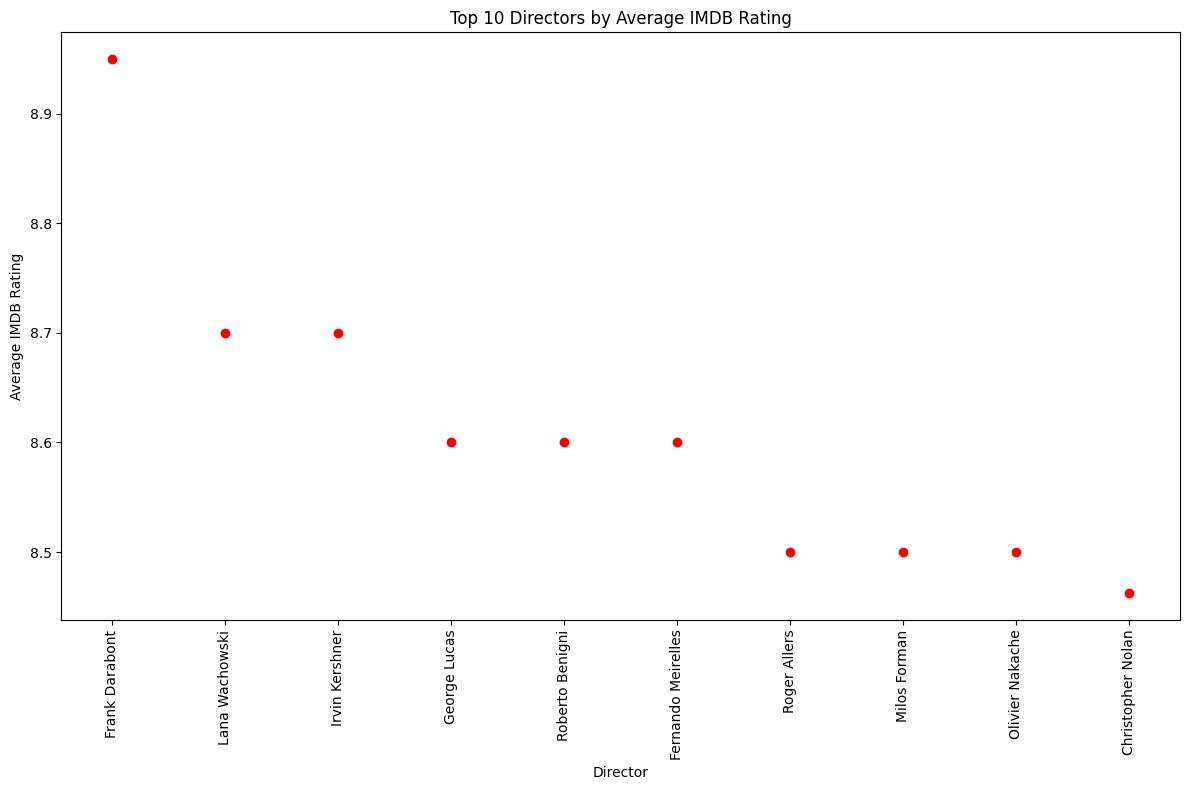

In [ ]:
directors = df.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.scatter(directors.index, directors.values, color='r')
plt.title('Top 10 Directors by Average IMDB Rating')
plt.xlabel('Director')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Star Power Analysis

In [ ]:
# Dont know how to do this one, since we need to isoleate the actors from the string and IDK what values to use when encoding.

BoxPlot

C:\Users\User\AppData\Local\Temp\ipykernel_47884\3688124204.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='IMDB_Rating', data=df, palette='viridis')


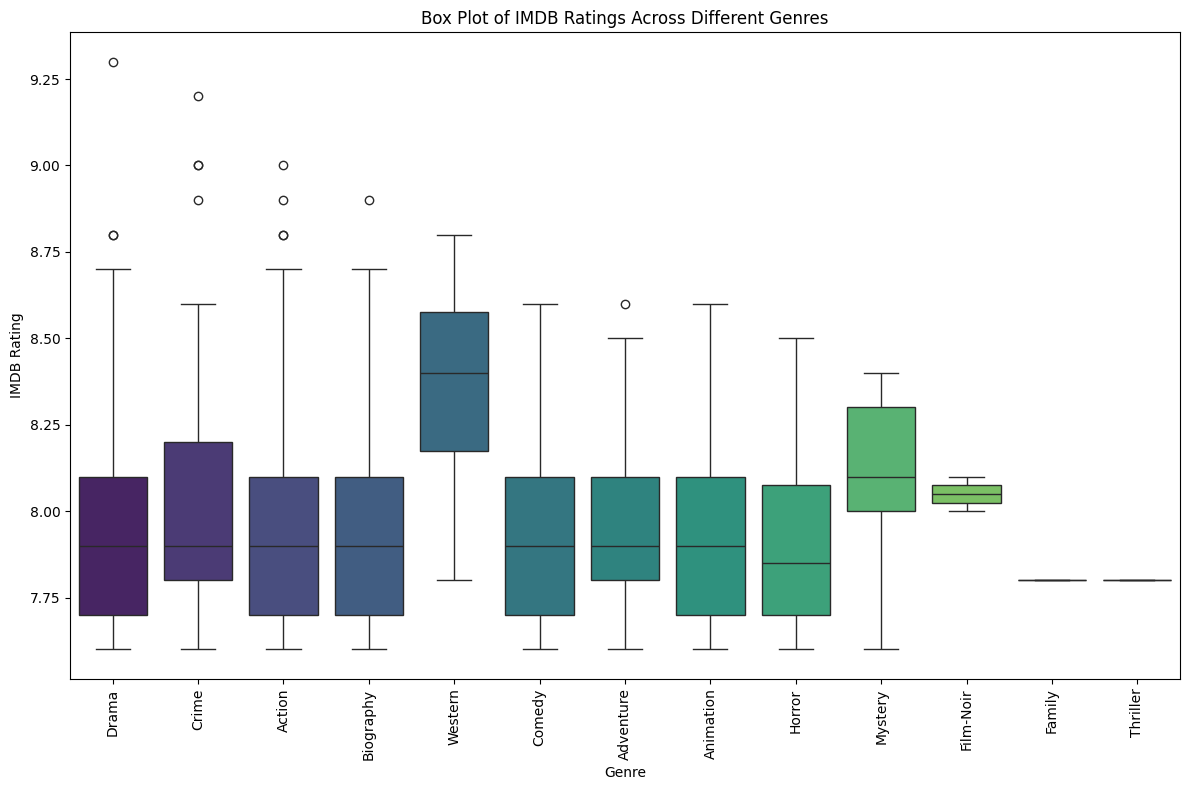

In [43]:
df['Genre'] = df['Genre'].str.split(',').apply(lambda x: x[0])

plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='IMDB_Rating', data=df, palette='viridis')
plt.title('Box Plot of IMDB Ratings Across Different Genres')
plt.xlabel('Genre')
plt.ylabel('IMDB Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
